In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline

In [4]:
import "wealth-ineq-sim" as wis

SyntaxError: invalid syntax (<ipython-input-4-dd16f48f7dab>, line 1)

In [36]:
sim = WealthSim()

In [37]:
sim.step(100)

/dockvol/wealth_ineq_sim/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
sim.wealths

,person,time_step,wealth
0,0,0,1.000000
1,1,0,1.000000
2,2,0,1.000000
3,3,0,1.000000
4,4,0,1.000000
...,...,...,...
995,995,100,0.542482
996,996,100,0.207619
997,997,100,0.511833
998,998,100,1.414696


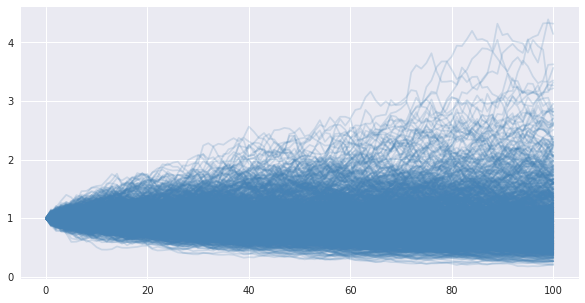

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
for person in sim.wealths.person.unique():
    wealths = sim.wealths[sim.wealths.person == person].sort_values("time_step")
    ax.plot(wealths.time_step, wealths.wealth, color="steelblue", alpha=0.2)
fig.savefig("./Images/first_sim_wealths.png", bbox_inches = "tight")

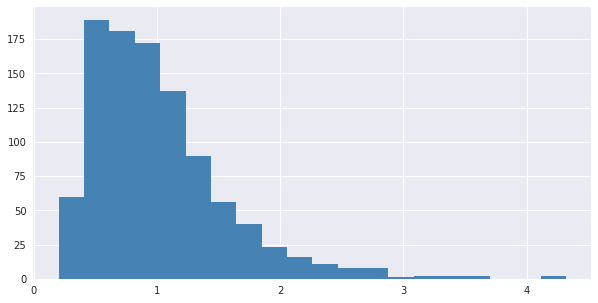

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(sim.wealths[sim.wealths.time_step == sim.time_step].wealth, color="steelblue", bins = 20);
fig.savefig("./Images/first_sim_wealths_hist.png", bbox_inches = "tight")

In [43]:
sim.wealths["pct_rank"] = sim.wealths.groupby(["time_step"]).wealth.rank(pct=True)

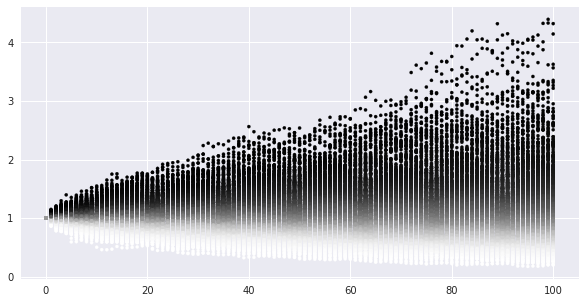

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(sim.wealths.time_step, sim.wealths.wealth, c=sim.wealths.pct_rank, s=10)

In [45]:
def group(pct_rank):
    if pct_rank < 0.5:
        return "lower"
    if pct_rank > 0.9:
        return "higher"
    else:
        return "middle"

In [46]:
sim.wealths["class"] = sim.wealths.pct_rank.map(group)

In [47]:
classes = sim.wealths.groupby(["time_step", "class"], as_index = False).wealth.sum()

In [48]:
classes

,time_step,class,wealth
0,0,middle,1000.000000
1,1,higher,108.799894
2,1,lower,477.818325
3,1,middle,411.934341
4,2,higher,112.207881
...,...,...,...
296,99,lower,309.325458
297,99,middle,484.787537
298,100,higher,223.639287
299,100,lower,307.622853


In [49]:
classes["ttl_wealth"] = classes[["time_step"]].merge(
    right = classes.groupby(["time_step"], as_index = False).wealth.sum(),
    on = ["time_step"],
    how="left")["wealth"]
classes["class_pct"] = classes.wealth / classes.ttl_wealth

In [50]:
classes

,time_step,class,wealth,ttl_wealth,class_pct
0,0,middle,1000.000000,1000.000000,1.000000
1,1,higher,108.799894,998.552559,0.108958
2,1,lower,477.818325,998.552559,0.478511
3,1,middle,411.934341,998.552559,0.412531
4,2,higher,112.207881,999.845183,0.112225
...,...,...,...,...,...
296,99,lower,309.325458,1018.474376,0.303715
297,99,middle,484.787537,1018.474376,0.475994
298,100,higher,223.639287,1014.302144,0.220486
299,100,lower,307.622853,1014.302144,0.303285


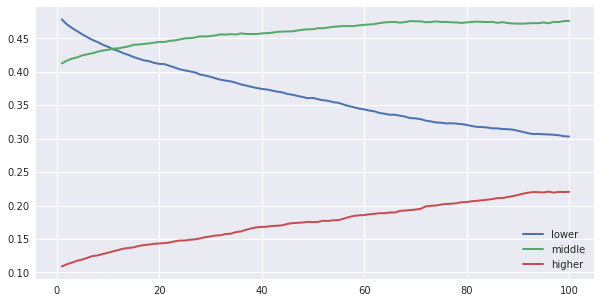

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))
for c in ["lower", "middle", "higher"]:
    class_data = classes[(classes["class"] == c) & (classes.time_step > 0)].sort_values("time_step")
    ax.plot(class_data.time_step, class_data.class_pct, linewidth = 2, label = c)
ax.legend()
fig.savefig("./Images/first_sim_wealths_class.png", bbox_inches = "tight")